In [7]:
import numpy as np
import matplotlib.pyplot as plt
#pip install openpyxl
#pip install statsmodels

In [8]:
#importare date
import pandas as pd

data_main=pd.read_excel('Price History_2025.xlsx')
print(data_main.columns)
type(data_main)
#help(data_main)

prices = np.array(data_main['Index Price'])[:6:-1]

data_main.set_index('Exchange Date', inplace=True)


Index(['Exchange Date', 'Index Price', 'Unnamed: 2'], dtype='object')


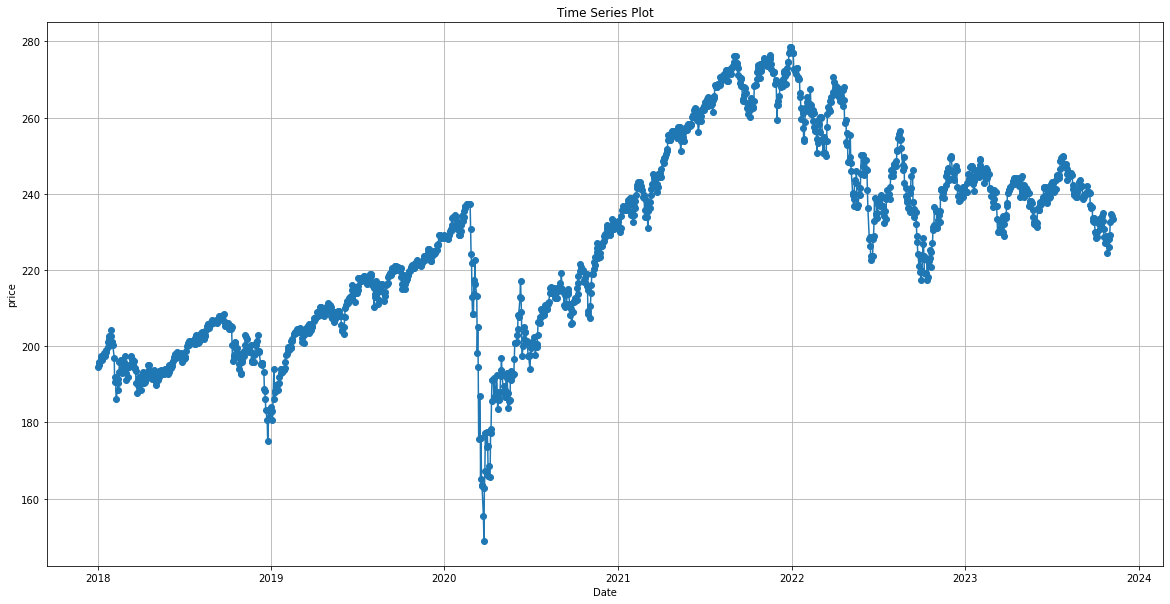

In [9]:
plt.figure(figsize=(20,10))
X=np.array(data_main.index[:6:-1])
Y=np.array(prices)

plt.plot(X,Y, marker='o', linestyle='-')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('price')
plt.title('Time Series Plot')
#plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

In [10]:
def diferenta_procentuala(x):
    n, =np.shape(x)
    s=np.zeros(n-1)
    for i in range(n-1):
        s[i]=x[i+1]/x[i]
        
    return s



In [11]:
# visualizare schimbare zilnica

diff= diferenta_procentuala(Y)

print(diff[-5:])


[1.00482393 1.01501331 1.00885755 0.99791161 0.9973093 ]


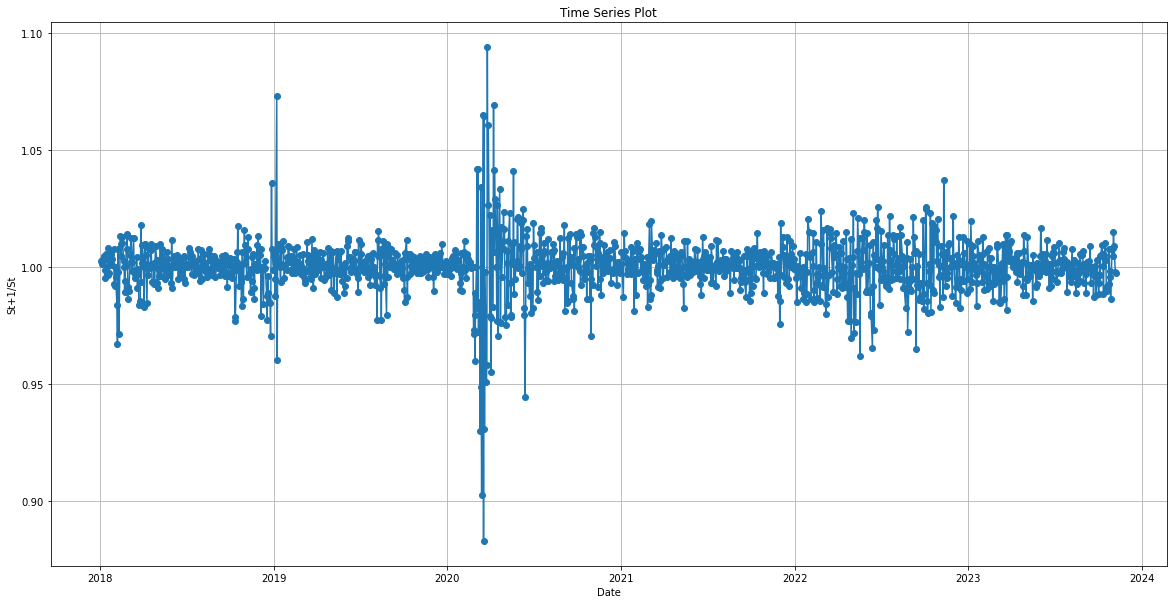

In [12]:

plt.figure(figsize=(20,10))
plt.plot(X[1:],diff, marker='o', linestyle='-')


# Formatting the plot
plt.xlabel('Date')
plt.ylabel('St+1/St')
plt.title('Time Series Plot')
#plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

In [14]:
#Model Autoregresiv
from statsmodels.tsa.ar_model import AutoReg
# P_t= a_1*P_t-1+...+a_k*P_t-k +eps


#aplic modelul autoregresiv pentru pret

model1 = AutoReg(prices, lags=15)
model_fit1=model1.fit()
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1514
Model:                    AutoReg(15)   Log Likelihood               -3399.216
Method:               Conditional MLE   S.D. of innovations              2.337
Date:                Mon, 24 Mar 2025   AIC                           6832.432
Time:                        10:39:11   BIC                           6922.746
Sample:                            15   HQIC                          6866.079
                                 1514                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1090      0.553      2.005      0.045       0.025       2.193
y.L1           0.9472      0.026     36.697      0.000       0.897       0.998
y.L2           0.1403      0.036      3.948      0.000       0.071       0.210
y.L3          -0.0895      0.036     -2.507      0.012      -0.160      -0.020
y.L4          -0.0380      0.036     -1.063      0.288      -0.108       0.032
y.L5           0.0556      0.036      1.556      0.120      -0.014       0.126
y.L6          -0.0997      0.036     -2.800      0.005      -0.170      -0.030
y.L7           0.1466      0.036      4.122      0.000       0.077       0.216
y.L8          -0.0925      0.036     -2.593      0.010      -0.163      -0.023
y.L9           0.1312      0.036      3.688      0.000       0.061       0.201
y.L10         -0.1343      0.036     -3.766      0.000      -0.204      -0.064
y.L11          0.0335      0.036      0.935      0.350      -0.037       0.104
y.L12         -0.0591      0.036     -1.651      0.099      -0.129       0.011
y.L13          0.0258      0.036      0.720      0.471      -0.044       0.096
y.L14          0.0614      0.036      1.727      0.084      -0.008       0.131
y.L15         -0.0332      0.026     -1.284      0.199      -0.084       0.017
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0409           -0.4288j            1.1258           -0.4378
AR.2            -1.0409           +0.4288j            1.1258            0.4378
AR.3            -1.5410           -0.0000j            1.5410           -0.5000
AR.4            -0.7647           -0.9666j            1.2325           -0.3565
AR.5            -0.7647           +0.9666j            1.2325            0.3565
AR.6            -0.2746           -1.2238j            1.2543           -0.2851
AR.7            -0.2746           +1.2238j            1.2543            0.2851
AR.8             0.2813           -1.1780j            1.2112           -0.2127
AR.9             0.2813           +1.1780j            1.2112            0.2127
AR.10            0.8535           -0.8300j            1.1906           -0.1228
AR.11            0.8535           +0.8300j            1.1906            0.1228
AR.12            1.0049           -0.0000j            1.0049           -0.0000
AR.13            1.3294           -0.3752j            1.3814           -0.0438
AR.14            1.3294           +0.3752j            1.3814            0.0438
AR.15            1.6173           -0.0000j            1.6173           -0.0000
------------------------------------------------------------------------------
"""

In [15]:
#predictie
forecast = model_fit1.predict(start=len(prices), end=len(prices)+5)


print(forecast)

[233.49444079 232.99218224 233.0368859  233.27603196 233.55868736
 233.86389355]


In [93]:
#Model 2 pe auto regresiv pe diferente procentuale
model2=AutoReg(diff, lags=15)
model_fit2=model2.fit()
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1512
Model:                    AutoReg(15)   Log Likelihood                4616.007
Method:               Conditional MLE   S.D. of innovations              0.011
Date:                Fri, 21 Mar 2025   AIC                          -9198.014
Time:                        13:19:59   BIC                          -9107.723
Sample:                            15   HQIC                         -9164.374
                                 1512                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0393      0.102     10.142      0.000       0.838       1.240
y.L1          -0.0772      0.026     -2.987      0.003      -0.128      -0.027
y.L2           0.1148      0.026      4.430      0.000       0.064       0.166
y.L3          -0.0027      0.026     -0.103      0.918      -0.054       0.048
y.L4          -0.0701      0.026     -2.694      0.007      -0.121      -0.019
y.L5           0.0188      0.026      0.721      0.471      -0.032       0.070
y.L6          -0.0924      0.026     -3.545      0.000      -0.144      -0.041
y.L7           0.0830      0.026      3.186      0.001       0.032       0.134
y.L8          -0.0335      0.026     -1.283      0.200      -0.085       0.018
y.L9           0.1022      0.026      3.922      0.000       0.051       0.153
y.L10         -0.0221      0.026     -0.848      0.396      -0.073       0.029
y.L11          0.0018      0.026      0.071      0.944      -0.049       0.053
y.L12         -0.0674      0.026     -2.589      0.010      -0.118      -0.016
y.L13         -0.0461      0.026     -1.766      0.077      -0.097       0.005
y.L14          0.0385      0.026      1.483      0.138      -0.012       0.089
y.L15          0.0133      0.026      0.512      0.608      -0.037       0.064
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8263           -0.8063j            1.1545           -0.1230
AR.2             0.8263           +0.8063j            1.1545            0.1230
AR.3             1.2456           -0.4019j            1.3088           -0.0497
AR.4             1.2456           +0.4019j            1.3088            0.0497
AR.5             1.4770           -0.0000j            1.4770           -0.0000
AR.6             0.3074           -1.1490j            1.1895           -0.2084
AR.7             0.3074           +1.1490j            1.1895            0.2084
AR.8            -0.2485           -1.1967j            1.2223           -0.2826
AR.9            -0.2485           +1.1967j            1.2223            0.2826
AR.10           -0.7525           -0.9716j            1.2289           -0.3549
AR.11           -0.7525           +0.9716j            1.2289            0.3549
AR.12           -1.0260           -0.4353j            1.1145           -0.4361
AR.13           -1.0260           +0.4353j            1.1145            0.4361
AR.14           -1.6351           -0.0000j            1.6351           -0.5000
AR.15           -3.4466           -0.0000j            3.4466           -0.5000
------------------------------------------------------------------------------
"""

Vedem componentele L3 L5 L10 L11 si L15 au P>|z| este mare, adica nu se potriveste bine pe model

Cred ca din cauza ca probabilitatea este calculata in modelul in care noise-ul este normal distribuit, insa dupa diferentele procentualea aceasta ipoteza ar trebui sa cada.

Dar calculelele coeficientilor(OLS) sunt facute indiferent de distributia noise-ului.

Suprinzator, Log Likelihood e foarte mare.

In [37]:
#removing outlier

def gasire_outlier(y,tol=1):
    medie=np.mean(y)
    n, =np.shape(y)
    raza=np.std(y)*tol
    vector_indici=[]
    for i in range(n):
        if abs(y[i] - medie)<= raza:
            vector_indici.append(False)
        else:
            vector_indici.append(True)
    
    return vector_indici

In [40]:
# test 

rezultat = gasire_outlier(np.array(list(range(25))))
print(rezultat)
print(len(rezultat))

[True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True]
25


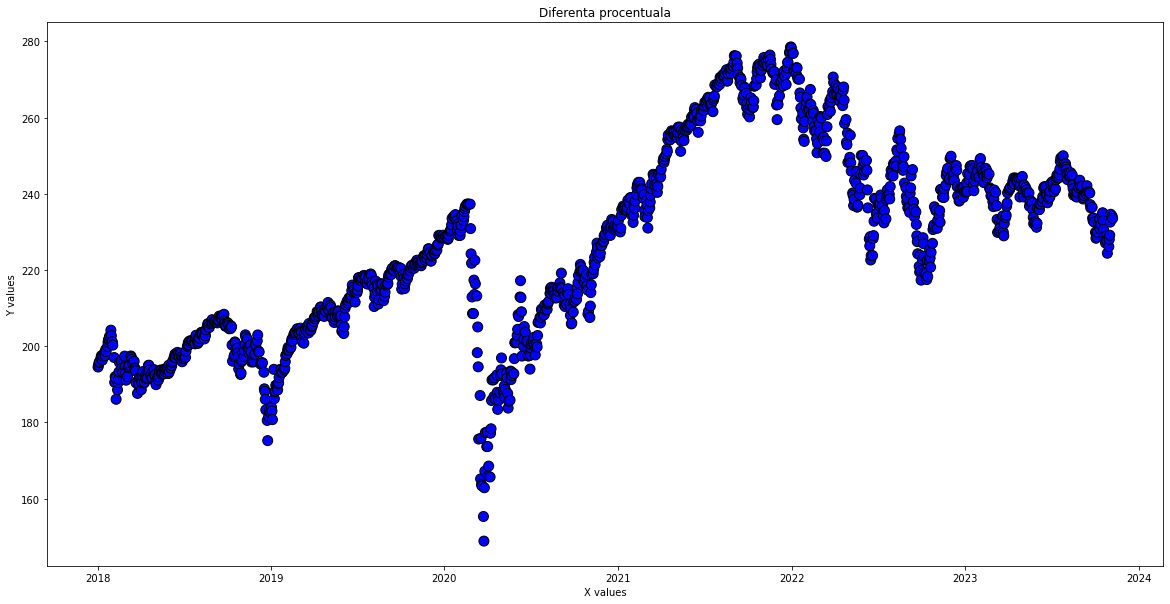

In [56]:
tol=4
X=np.array(data_main.index)[:6:-1]
Y=np.array(data_main["Index Price"])[:6:-1]
colors=np.where(gasire_outlier(Y,tol), 'red', 'blue')

plt.figure(figsize=(20,10))
plt.scatter(X,Y, c=colors, edgecolors="k", s=100)

# Labels
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Diferenta procentuala")

# Show the plot
plt.show()


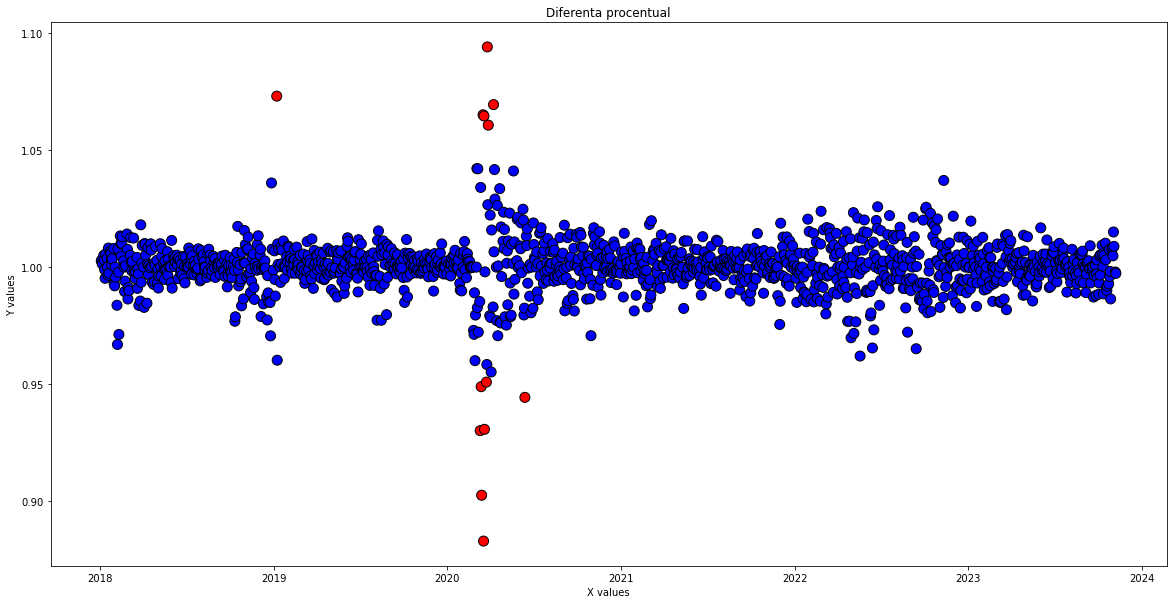

In [55]:

tol=4
X=np.array(data_main.index)[:6:-1]
Y=diferenta_procentuala(np.array(data_main["Index Price"])[:6:-1])
colors=np.where(gasire_outlier(Y,tol), 'red', 'blue')

plt.figure(figsize=(20,10))
plt.scatter(X[1:],Y, c=colors, edgecolors="k", s=100)

# Labels
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Diferenta procentuala")

# Show the plot
plt.show()


Graficul arata in 2020 sunt multe outlier-e, eu cred ca 

In [105]:
#model 3 OLS pe diferenta procentuala

import statsmodels.api as sm

def gasire_outlier2(y,tol=1):
    medie=np.mean(y)
    n, =np.shape(y)
    raza=np.std(y)*tol
    vector_indici=[]
    for i in range(n):
        if abs(y[i] - medie)<= raza:
            vector_indici.append(True)
        else:
            vector_indici.append(False)
    
    return vector_indici

Y1=Y[gasire_outlier2(Y,tol=4)]
ModelOLS= sm.OLS(np.ones(len(Y1)),Y1)

results = ModelOLS.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.219e+05
Date:                Fri, 21 Mar 2025   Prob (F-statistic):                        0.00
Time:                        13:38:59   Log-Likelihood:                          1183.5
No. Observations:                1514   AIC:                                     -2365.
Df Residuals:                    1513   BIC:                                     -2360.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [108]:
m = results.param()
print(m)
k=5
last_day=Price[-1]
predictie=np.zeros(k)
for i in range(k):
    predictie = last_day(1+coef)

AttributeError: 'OLSResults' object has no attribute 'param'